# Intro
Simple Program to load and plot some archived files for creating the flight report

For R0 of ORACLES of various instruments

# Load the defaults and imports

In [1]:
%config InlineBackend.rc = {}
import matplotlib 
matplotlib.rc_file('C:\\Users\\sleblan2\\Research\\python_codes\\file.rc')
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import Sp_parameters as Sp
from load_utils import mat2py_time, toutc, load_ict
from Sp_parameters import smooth

In [2]:
from linfit import linfit

In [3]:
%matplotlib notebook

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [4]:
fp ='C:/Users/sleblan2/Research/ORACLES/'

# Load the files

In [5]:
f_house = fp+'data//Hskping_P3_20160908_R0.ict'

In [6]:
f_ams = fp+'data//UHAMS_P3_20160908_R0.ict'

In [7]:
out_house,outh_house = load_ict(f_house,return_header=True)

('Start_UTC', 'Day_Of_Year', 'Latitude', 'Longitude', 'HAE_GPS_Altitude', 'Pressure_Altitude', 'Radar_Altitude', 'Ground_Speed', 'True_Air_Speed', 'Indicated_Air_Speed', 'Mach_Number', 'Vertical_Speed', 'True_Heading', 'Track_Angle', 'Drift_Angle', 'Pitch_Angle', 'Roll_Angle', 'Static_Air_Temp', 'Potential_Temp', 'Dew_Point', 'Total_Air_Temp', 'Static_Pressure', 'Cabin_Pressure', 'Wind_Speed', 'Wind_Direction', 'Solar_Zenith_Angle', 'Aircraft_Sun_Elevation', 'Sun_Azimuth', 'Aircraft_Sun_Azimuth', 'Mixing_Ratio', 'Part_Press_Water_Vapor', 'Sat_Vapor_Press_H2O', 'Sat_Vapor_Press_Ice', 'Relative_Humidity')


In [8]:
out_ams,outh_ams = load_ict(f_ams,return_header=True)

('Start_UTC', 'Stop_UTC', 'Mid_UTC', 'NO3', 'SO4', 'NH4', 'ORG')


# Now make a few plots of the data

<IPython.core.display.Javascript object>


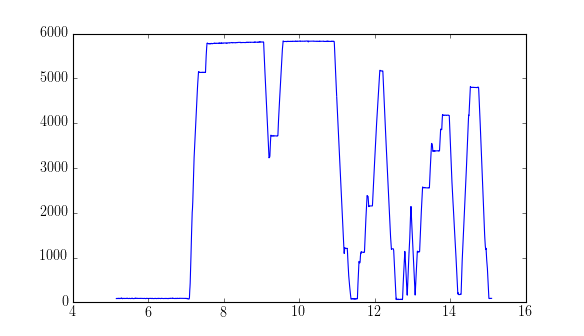

In [26]:
plt.figure()
plt.plot(out_house['Start_UTC'],out_house['HAE_GPS_Altitude'])

<IPython.core.display.Javascript object>


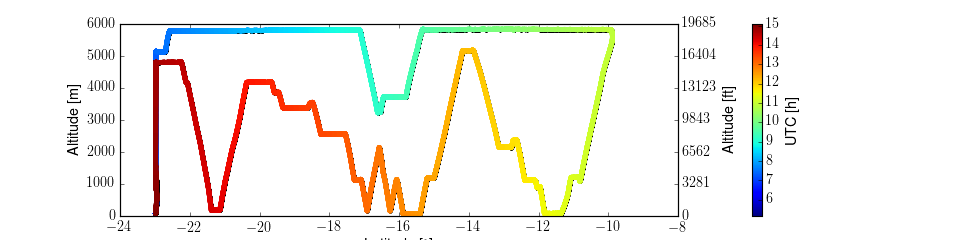

In [44]:
fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
ax.plot(out_house['Latitude'],out_house['HAE_GPS_Altitude'],'.k')
ax.set_ylim(0,6000)
asc = ax.scatter(out_house['Latitude'],out_house['HAE_GPS_Altitude'],20,c=out_house['Start_UTC'],
                 marker='o',edgecolor='None',zorder=20)
cb = fig.colorbar(asc,pad=0.10)
cb.set_label('UTC [h]')

ax.set_ylabel('Altitude [m]')
ax.set_xlabel('Latitude [$^\\circ$]')
ax1 = ax.twinx()
ax1.set_yticks(ax.get_yticks()*3.28084)
#ax1.plot(out_house['Latitude'],out_house['HAE_GPS_Altitude']*3.28084,'.k')
ax1.set_ylabel('Altitude [ft]')

fig.savefig(fp+'plot//RF06_20160908_profile.png',dpi=600,transparent=True)

## interpolate ams data to housekeeping

In [21]:
from scipy.interpolate import interp1d

In [ ]:
out_ams['utc'] = interp1d(

In [ ]:
fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
ax.plot(out_ams['Latitude'],out_ams['HAE_GPS_Altitude'],'.k')
ax.set_ylabel('Altitude [m]')
ax.set_xlabel('Latitude [$^\\circ$]')
ax1 = ax.twinx()
ax1.plot(out_house['Latitude'],out_house['HAE_GPS_Altitude']*3.28084,'.k')
ax1.set_ylabel('Altitude [ft]')
fig.savefig(fp+'plot//RF06_20160908_profile.png',dpi=600,transparent=True)